In [232]:
# from hw3

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype


cold coded vs off shelf for homew 6

In [287]:
from scipy.spatial import distance


# convert categorical column
def col_categorical_to_num(column):
    vals = pd.unique(column)
    for i in range(len(vals)):
        inds = column == vals[i]
        column[inds] = i
    return column

# convert data to numerical
def df_to_num(data):
    num_data = data.copy()
    # from 1 to 8
    for i in range(len(num_data[0,:])):
        if type(data[1, i]) == str:
            num_data[:,i] = col_categorical_to_num(data[:,i])
    return num_data

def full_kmeans(data, k):
    km_alg = KMeans(n_clusters=k, init="random", random_state=70, max_iter=200)
    fit = km_alg.fit(data)
    return fit.labels_, fit.cluster_centers_


def my_kmeans(data, k):
    pass

def spect_clustering(L, k):
    eigvals, eigvecs = np.linalg.eig(L)
    inds = np.abs(eigvals).argsort()
    ordered_eigvecs = eigvecs[:, inds]
    firstK = ordered_eigvecs[:, :k]
    labels, centers = full_kmeans(firstK, k)
    return labels, centers

def my_laplacian(adj_m):
    colsum = np.sum(adj_m, axis=0)
    degree = colsum[:]
    degree_diag = np.diag(degree)
    L = degree_diag - adj_m
    return L


def make_adj(data_in):
    distances = distance.cdist(data_in, data_in, 'euclidean')
    inds = distances < 1 / 2

    n_rows = distances.shape[0]
    adj_m = np.zeros([n_rows, n_rows])
    adj_m[inds] = 1
    diag = np.diag(np.diag(adj_m))
    adj_m = adj_m - diag
    return adj_m

In [291]:
# read in data
data = pd.read_csv("../penguins_size.csv").dropna()
data_np = pd.DataFrame.to_numpy(data)

# prepare for coloring
data_c = data_np.copy()
data_c = df_to_num(data_c)

print(data.columns)

array([[18.7, 181.0],
       [17.4, 186.0],
       [18.0, 195.0],
       [19.3, 193.0],
       [20.6, 190.0],
       [17.8, 181.0],
       [19.6, 195.0],
       [17.6, 182.0],
       [21.2, 191.0],
       [21.1, 198.0],
       [17.8, 185.0],
       [19.0, 195.0],
       [20.7, 197.0],
       [18.4, 184.0],
       [21.5, 194.0],
       [18.3, 174.0],
       [18.7, 180.0],
       [19.2, 189.0],
       [18.1, 185.0],
       [17.2, 180.0],
       [18.9, 187.0],
       [18.6, 183.0],
       [17.9, 187.0],
       [18.6, 172.0],
       [18.9, 180.0],
       [16.7, 178.0],
       [18.1, 178.0],
       [17.8, 188.0],
       [18.9, 184.0],
       [17.0, 195.0],
       [21.1, 196.0],
       [20.0, 190.0],
       [18.5, 180.0],
       [19.3, 181.0],
       [19.1, 184.0],
       [18.0, 182.0],
       [18.4, 195.0],
       [18.5, 186.0],
       [19.7, 196.0],
       [16.9, 185.0],
       [18.8, 190.0],
       [19.0, 182.0],
       [17.9, 190.0],
       [21.2, 191.0],
       [17.7, 186.0],
       [18

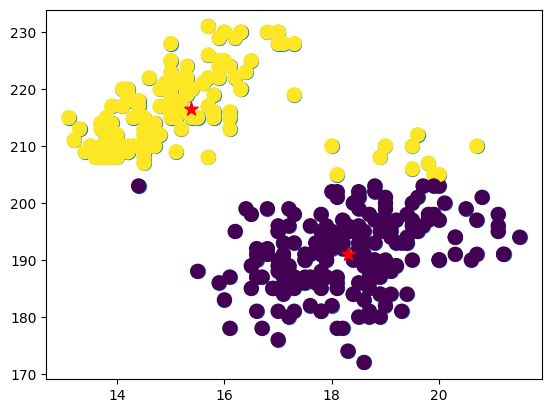

In [289]:
# first glance
plt.scatter(data_np[:,3], data_np[:,4], s=100)
#
labels, centers = full_kmeans(data_n, 2)
#
plt.scatter(data_np[:,3], data_np[:,4], s=100, c = labels)
plt.scatter(centers[:,0], centers[:,1], color = "red", marker="*", s = 100)



ValueError: Complex data not supported
[[0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j]]


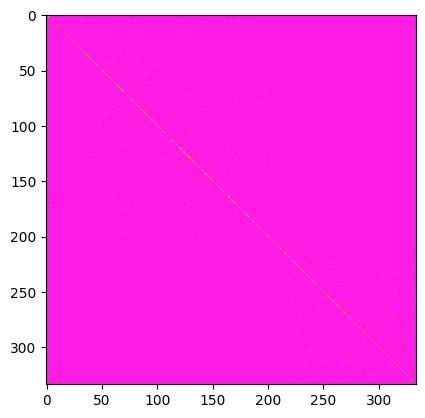

In [290]:


dats = data_np[:,3:5].astype(float)
L = my_laplacian(make_adj(dats))

plt.imshow(L, cmap="spring")
labels, centers = spect_clustering(L, 2)

# labels, centers = spect_clustering(L, 2)
#
# plt.scatter(data_np[:,3], data_np[:,4], s=100, c = labels)
# plt.scatter(centers[:,0], centers[:,1], color = "red", marker="*", s = 100)
